In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('housedata.csv')

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
area = data['area_type']
arrdum = pd.get_dummies(area,drop_first=True)
arrdum


,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
13315,0,0,0
13316,0,0,1
13317,0,0,0
13318,0,0,1


In [9]:
data.drop(labels=['area_type'],axis=1,inplace=True)

In [10]:
data = pd.concat([data,arrdum],axis=1)

In [11]:
data.head()

,availability,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,1
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,1,0
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,1
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,1


In [12]:
data['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
14-Nov               1
15-Jun               1
16-Jan               1
16-Oct               1
Name: availability, Length: 81, dtype: int64

In [13]:
data['availability'][1].split('-')

['Ready To Move']

In [14]:
def split_availability(date):
    if(len(date.split('-')) == 2):
        return date.split('-')[1]
    else:
        return date

In [15]:
for i in range(len(data['availability'])):
    data['availability'][i] = split_availability(data['availability'][i])
    

C:\Users\saifgazali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
data['availability'].value_counts()

Ready To Move           10581
Dec                       728
May                       338
Apr                       298
Aug                       249
Mar                       246
Jul                       206
Jun                       200
Jan                       126
Oct                        91
Sep                        87
Nov                        79
Feb                        75
Immediate Possession       16
Name: availability, dtype: int64

In [17]:
av = data['availability']
avv = pd.get_dummies(av,drop_first=True)
avv


,Aug,Dec,Feb,Immediate Possession,Jan,Jul,Jun,Mar,May,Nov,Oct,Ready To Move,Sep
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,0,1,0
13316,0,0,0,0,0,0,0,0,0,0,0,1,0
13317,0,0,0,0,0,0,0,0,0,0,0,1,0
13318,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
data.drop(labels=['availability'],axis=1,inplace=True)

In [19]:
data = pd.concat([data,avv],axis=1)

In [20]:
data.head()

,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,...,Immediate Possession,Jan,Jul,Jun,Mar,May,Nov,Oct,Ready To Move,Sep
0,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [21]:
data.isnull().sum()

location                   1
size                      16
society                 5502
total_sqft                 0
bath                      73
balcony                  609
price                      0
Carpet  Area               0
Plot  Area                 0
Super built-up  Area       0
Aug                        0
Dec                        0
Feb                        0
Immediate Possession       0
Jan                        0
Jul                        0
Jun                        0
Mar                        0
May                        0
Nov                        0
Oct                        0
Ready To Move              0
Sep                        0
dtype: int64

In [22]:
data['location'].value_counts()

Whitefield              540
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
Devarabisanahalli         1
Narayanappa Layout        1
1Hanuman Nagar            1
Off Bannergatta Road      1
Chikkabettahalli          1
Name: location, Length: 1305, dtype: int64

In [23]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
13 BHK           1
27 BHK           1
43 Bedroom       1
16 BHK           1
18 Bedroom       1
12 Bedroom       1
19 BHK           1
14 BHK           1
Name: size, dtype: int64

In [24]:
data['size'][10]

'3 BHK'

In [25]:
def preprocess_size(size):
    return (str(size).split())[0]

In [26]:
for i in range(len(data['size'])):
    data['size'][i] = preprocess_size(data['size'][i])

C:\Users\saifgazali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
data['size'].value_counts()

2      5528
3      4857
4      1417
1       656
5       356
6       221
7       100
8        89
9        54
nan      16
10       14
11        4
16        1
19        1
13        1
18        1
12        1
43        1
27        1
14        1
Name: size, dtype: int64

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(data[['size']]) #accepts only column with numerical values 
data['size'] = imputer.transform(data[['size']])

In [29]:
data['size'].value_counts()

2.000000     5528
3.000000     4857
4.000000     1417
1.000000      656
5.000000      356
6.000000      221
7.000000      100
8.000000       89
9.000000       54
2.803743       16
10.000000      14
11.000000       4
18.000000       1
14.000000       1
43.000000       1
12.000000       1
13.000000       1
19.000000       1
27.000000       1
16.000000       1
Name: size, dtype: int64

In [30]:
data.isnull().sum()

location                   1
size                       0
society                 5502
total_sqft                 0
bath                      73
balcony                  609
price                      0
Carpet  Area               0
Plot  Area                 0
Super built-up  Area       0
Aug                        0
Dec                        0
Feb                        0
Immediate Possession       0
Jan                        0
Jul                        0
Jun                        0
Mar                        0
May                        0
Nov                        0
Oct                        0
Ready To Move              0
Sep                        0
dtype: int64

In [31]:
## Filling the bath column according to the number of bedrooms
bath1 = [] #Calculating the number of baths equl to bedroom
bath2 = [] #Calculating the number of baths less to bedroom
bath3 = [] #Calculating the number of baths more to bedroom

In [32]:
def compBathNBHK(bath,bhk):
    if pd.isnull(bath):
        return
    else:
        if bath == bhk:
            bath1.append(bath)
        elif bath < bhk:
            bath2.append(bath)
        else:
            bath3.append(bath)

In [33]:
for i in range(len(data['bath'])):
    compBathNBHK(data['bath'][i],data['size'][i])

In [34]:
len(bath1)

10069

In [35]:
len(bath2)

2272

In [36]:
len(bath3)

906

In [37]:
## hence we can assume that bathroom can be equal to number of bedrooms

for i in range(len(data['bath'])):
    if(pd.isnull(data['bath'][i])):
        data['bath'][i] = data['size'][i]
        

C:\Users\saifgazali\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
data.isnull().sum()

location                   1
size                       0
society                 5502
total_sqft                 0
bath                       0
balcony                  609
price                      0
Carpet  Area               0
Plot  Area                 0
Super built-up  Area       0
Aug                        0
Dec                        0
Feb                        0
Immediate Possession       0
Jan                        0
Jul                        0
Jun                        0
Mar                        0
May                        0
Nov                        0
Oct                        0
Ready To Move              0
Sep                        0
dtype: int64

In [39]:
bath1 = []
bath2 = []
bath3 = []
size1 = []
size2 = []
size3 = []

In [40]:
### checking the same for balcony
def compBalcNBath(bath,balc):
    if pd.isnull(balc):
        return
    else:
        if balc == bath:
            bath1.append(balc)
        elif balc < bath:
            bath2.append(balc)
        else:
            bath3.append(balc)


In [41]:
for i in range(len(data['balcony'])):
    compBalcNBath(data['bath'][i],data['balcony'][i])

In [42]:
print(len(bath1))
print(len(bath2))
print(len(bath3))

3894
8265
552


In [43]:
# checking wrt to size
def compBalcNBath(bhk,balc):
    if pd.isnull(balc):
        return
    else:
        if balc == bhk:
            size1.append(bhk)
        elif balc < bhk:
            size2.append(bhk)
        else:
            size3.append(bhk)


In [44]:
for i in range(len(data['balcony'])):
    compBalcNBath(data['size'][i],data['balcony'][i])

In [45]:
print(len(size1))
print(len(size2))
print(len(size3))

3348
8998
365


In [46]:
data['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [47]:
## Assigning bhk-1 to balconies
for i in range(len(data['balcony'])):
    if(pd.isnull(data['balcony'][i])):
        data['balcony'][i] = data['size'][i] - 1
        

C:\Users\saifgazali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
data.isnull().sum()

location                   1
size                       0
society                 5502
total_sqft                 0
bath                       0
balcony                    0
price                      0
Carpet  Area               0
Plot  Area                 0
Super built-up  Area       0
Aug                        0
Dec                        0
Feb                        0
Immediate Possession       0
Jan                        0
Jul                        0
Jun                        0
Mar                        0
May                        0
Nov                        0
Oct                        0
Ready To Move              0
Sep                        0
dtype: int64

In [49]:
data_train = data

In [50]:
data_train.isnull().sum()

location                   1
size                       0
society                 5502
total_sqft                 0
bath                       0
balcony                    0
price                      0
Carpet  Area               0
Plot  Area                 0
Super built-up  Area       0
Aug                        0
Dec                        0
Feb                        0
Immediate Possession       0
Jan                        0
Jul                        0
Jun                        0
Mar                        0
May                        0
Nov                        0
Oct                        0
Ready To Move              0
Sep                        0
dtype: int64

In [51]:
data_train.head()

,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,...,Immediate Possession,Jan,Jul,Jun,Mar,May,Nov,Oct,Ready To Move,Sep
0,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,Kothanur,2.0,NaN,1200,2.0,1.0,51.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [52]:
data_train['Carpet  Area'].dtype

dtype('uint8')

In [53]:
data_train['Carpet  Area'] = pd.to_numeric(data_train['Carpet  Area'])

In [54]:
data_train['total_sqft'].dtype

dtype('O')

In [55]:
int(data_train['total_sqft'][0])

1056

In [56]:
data_train['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [57]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [58]:
data_train[~data_train['total_sqft'].apply(isfloat)].head(10)

,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,...,Immediate Possession,Jan,Jul,Jun,Mar,May,Nov,Oct,Ready To Move,Sep
30,Yelahanka,4.0,LedorSa,2100 - 2850,4.0,0.0,186.000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
56,Devanahalli,4.0,BrereAt,3010 - 3410,4.0,3.0,192.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,Hennur Road,4.0,Gollela,2957 - 3450,4.0,3.0,224.500,0,0,0,...,0,0,0,0,0,0,0,1,0,0
122,Hebbal,4.0,SNontle,3067 - 8156,4.0,0.0,477.000,0,0,1,...,0,0,0,0,1,0,0,0,0,0
137,8th Phase JP Nagar,2.0,Vaarech,1042 - 1105,2.0,0.0,54.005,0,0,1,...,0,0,0,0,1,0,0,0,0,0
165,Sarjapur,2.0,Kinuerg,1145 - 1340,2.0,0.0,43.490,0,0,1,...,0,0,0,0,0,0,0,0,0,0
188,KR Puram,2.0,MCvarar,1015 - 1540,2.0,0.0,56.800,0,0,1,...,0,0,0,0,0,0,0,0,1,0
224,Devanahalli,3.0,Jurdsig,1520 - 1740,3.0,2.0,74.820,0,0,1,...,0,0,0,0,0,0,0,0,0,0
410,Kengeri,1.0,NaN,34.46Sq. Meter,1.0,0.0,18.500,0,0,1,...,0,0,0,0,0,0,0,0,1,0
549,Hennur Road,2.0,Shxorm,1195 - 1440,2.0,0.0,63.770,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [59]:
def convertit(x):
    print(x)
    tokens = x.split('-')
    if(len(tokens) == 2):
        return ((float(tokens[0]) + float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [60]:
convertit('2122')

2122


2122.0

In [61]:
convertit('2122 - 211')

2122 - 211


1166.5

In [62]:
data_train['total_sqft'].dtype

dtype('O')

In [63]:
convertit(data_train['total_sqft'][0])

1056


1056.0

In [64]:
df4 = data_train.copy()

In [65]:
df4['total_sqft'] = df4['total_sqft'].apply(convertit)
df4.head()

1056
2600
1440
1521
1200
1170
2732
3300
1310
1020
1800
2785
1000
1100
2250
1175
1180
1540
2770
1100
600
1755
2800
1767
510
1250
660
1610
1151
1025
2100 - 2850
1075
1760
1693
1925
700
1070
1724
1290
1143
1296
1254
600
660
1330.74
600
970
1459
800
869
1270
1670
2010
1185
1600
1200
3010 - 3410
1500
1407
840
4395
845
5700
1160
3000
1100
1140
1220
1350
1005
500
1358
1569
1240
2089
1206
1150
2511
460
4400
1660
2957 - 3450
1326
1325
1499
3000
1665
708
1060
710
1000
1000
1450
1200
1296
1540
2894
1330
1200
1200
2502
650
2400
1007
1200
966
1630
1640
782
1260
1800
1413
1116
1530
3700
2497
1540
1436
1100
276
1427
2061
3067 - 8156
2650
1282
1050
1600
945
1500
950
1870
1600
880
1200
1535
950
1360
1042 - 1105
1280
1260
5000
3050
1563.05
1000
1167
4000
1828
890
1612
1034
1710
957
1250
2795
1125
1020
1200
1735
2050
3750
1350
1063
1904
4200
2000
1145 - 1340
1425
1500
1060
1470
1300
450
1152
1350
1550
1500
600
400
705
770
1242
1700
2144
1704
1070
1846
1340
1025
1015 - 1540
1200
2250
1550
1200
1800
1200
1

1156
2017
3122
1635
4400
1296
2400
1139
1230
581.91
1245
1158
3951
550
360
1350
1670
1600
1307
1050
1703
1210
1025
1140
1343
1560
925
1420
1415
1210
1852
1250
1100
1150
1100
1350
1546
1424
1398
1650
1200
1476
500
1322
432
1100
4750
1285
1150
1430
1350
1350
1185
1760
2400
900
1297
1840
950
1200
950
1250 - 1305
1571
1031
1485
1109
2200
950
1200
1161
2350
1003
1350
1080
1255
1250
1700
1200
824
1875
1320
9600
1330
1220
1111
1197
2519
1340
1450
1837
1200
1238
1405
1690
1620
1673
1090
1112
1385
545
985
670 - 980
1080
1430
1050
2000
4800
1533
2800
2610
1750
1200
1352
1754
1560
3012
3584
1470
1035
2400
1160
1100
1170
595
1650
1875
800
1375
1235
750
1400
1270
1105
1375
2168
1200
1065
3800
3125
825
1095
720
1440
870
1195
1200
1530
1708
975
750
1200
1920
1200
1183
1140
1550
1110
1500
1105
1800
2800
1000
1190
1350
3067
1929
1525
1775
1125
900
1155
1200
1268
1500
630
1525
1060
1687
1847
1410
1075
3526
3000
1500
1010
1875
1200
983
1101
1140
1215
1007
2039
1020
1198
4000
1470
1370
1316
1350
1050
1005

1890
735
500
1304
1653
1075
1212
1100
3436
1200
1140
1200
1532
2776
1531
1270
1325
1200
1156
2000
1260
1934
1060
1476
1185
1265
3200
1196
1280
800
1175
1850
2400
1195
2000
600
800
1180
1050
1400
2360
1030
1512
929
1252
1485
1124
2400
1407
1482
1163
1570
3480
520
2000
1352
1152
1575
1965
1300
1
957
1740
1080
1060
975
1150
1738
1250
1788
1151
1300
1150
1380
1645
1141
1175
1355
1150
5800
1000
1007
3000
1436
4000
2372
1500
167Sq. Meter
1200
1016
1100
1080
1070
1532
1040
3100
1076 - 1199
1430
1160
3262
2100
1190
1827
1210
1500
1050
1251
1600
1128
1820
2072
1510
1925
2651
2072
1000
1752
960
1180
2270
650
1200
1180
1300
1157
1300
1305
2006
1290
1170
971
1400
1200
1155
1725
700
7000
1112
1178
1274
915
1650
760
1540
1206
1645
1200
1200
2342
1200
1056
4800
1450
1161
1097
850
1715
2300
1200
1080
1200
2400
1400
1500
381 - 535
1230
1640
1700
1478
6600
1020
1200
1275
1600
1110
1627.86
620
3004
1133
1182
1500
3900
1200
1128
2215 - 2475
900
1100
635
2062
1874
600
1171
2020
1059
1315
1760
1200
1192
164

1566
1630
1256
1200
1595
1000
1475
2400
1000
2360
1737
1000
2100
3600
883
1243
1776
1347
1330
600
3730
1459
2259
2700
1008
1200
2328
600
660
1800
3100
1180 - 1630
602
1710
1500
1539
806
1100
1151
920
1350
1200
1265
600
1700
1600
1550
1560
1000
1243
1200
1403
1010
1416
1628
1660.4
1680
1595
1507
2560
1949
800
1000
905
2480
1495
1605
1290
1100
2100
995
500
3526
1425
1455
550
1385
7000
4000
1060
1080
1783
1520
1060
1267
1155
2500
1240
1570
1019
1355
1537
4075
1550
1100
1750
1466
1550
2300
540
950
2800
1020
2880
1987
1305
2100
1125
1225
1255
1191
3600
1165
865
1850
497
1232
1732
1614
600
2072
919
2100
672
800
1200
2849
1000
1216
2245
1476
1852
1225
1597
2423
1152
1762
1400
1530
2400
1185
1890
1247
700
1000
1201
830
1165
1100
1890
1685
3131
1165
827
396
1200
635
4000
1050
600
1819.18
1500
1500
2850
1751
4750
1020
1148
1856
1754
4273
1060
1300
3000
1325
1261
1100
700
1675
3400
3260
1180
1160
1863
1914
1458
1200
1105
3035
1200
1662
1556
918
1455
1205
1194
1200
1100
1405
929
3436
1035
2100
106

1308
3060
1200
800
530
873
3000
1200
958
2072
2273
600
760
1090
2072
2666
1550
1251
1070
1200
1435
1400
2330
1200
1000
1655
3600
600
1175
1155
1200
1149
1610 - 1880
3200
1010
1718
650
1330
1200
1693
1249
1800
900
1020
1700
661
1280
1000
1170
933
1150
3633
1380
1050
1080
1303
1196
2500
1200
1250
1419
1200
1120
755 - 770
1245
3978
1093
1025
1345
1500
1180
1020
1800
3621
2008
1240
1020
2095
1362
694
1404
1192
1850
1050
1259
1000
985
850
1650
2400
1900
1367
1210
1190
1175
2800
1140
1095
782
1435
725
1600
1200
3205
720
1674
860
1243
1703
1350
1145
1216
1100
2425
2700
1196
1600
1510
3033
780
1194
1250
1480
1250
1350
620
1630
1020
1410
1181.7
1200
1691
1200
1200
1050
1300
1356
1338
500
1280
1531
11000
620
1605
1917
1200
2750
1400
2625
1100
2041
2070
1110
1650
3565
1033
1142
1500
1502
1176
1063
1100
1044
5400
1216
1425
1200
1345
1248
1830
900
3600
1025
840
3050
1424
2500
1200
1285
1450
1160
2700
2000
1125
3900
1133
1240
1466
3870
1610
1220
1225
1300
1996
1320
1800
1835
1435
4097
1601
1257
3596

1365
580
1355
1500
1513
1175
2087
2273
2050
1200
1190
600
1019
1830
4278
1028
1300
1160
1505
1250
400
1175
1100
2159
1230
1200
3100
4500 - 5540
1200
1340
1750
1400
1350
1675
1340
600
1276
1738
1190
1128
1250
1450
1084
2150
6000
600
1250
2400
1304
1640
980
1275
10030
2500
3600
2400
2300
1450
890
1340
1100
750
700
1300
1301
3200
1900
1299
1250
1600
925
3900
1107
1400
1300
570
1715
1200
1200
703
921
1144
525
1400
661
1200
1200
1705
1035
1430
1240
1325
1230
1000
740
1330
3005
1300
1243
936
1500
1200
1073
1300
4201
1065
1216
1252
1196
1027
610
1270
1171
1215
600
1180
1160
4382
2140
1500
1008
1921
1127
1621
2400
1030
1314
1220
600
1590
703
1795
3000
4395
825
4025
1254
2040
2215
1478
2475
1669
1820
1623
1243
1200
1613
1293
1065
940
1181
2215
1100
1050
1260
2800
1500
1200
1000
1530
1140
1864
1575
1200
945
1691
1200
1220
600
1160
1950
1650
2400
795
800
1400
2285
1243
1263
1200
1345
4400
1360
1026
1050
1460
1525
1843
1000
1642
1200
975
1075
1210
2000
1225
1290
1220
1500
1361
2801.25
1394
870
500

1665
1800
1197
1050
910
1241
1567
1747
1475
600
1524
980
966
2360
1112
550
1760
1830
1175
1175
1025
1232
1010
1273
1590
1100
1252
2615
1200
1322
1000
1755
1135
1200
1200
1260
3250
3500
1200
1100
1305
1236
1125
1075
2000
772
2999.97
1150
1440
1085
1785
2475
1930
600
800
2450
1200
1920
1085
760
1201
1615
1289
1991
1377
2880
1892
2176
663
1165
3554
1260
1095
1050
1176
1801
1315
1194
2400
1308
4250
1806
3671
2144
1065
1205
1160
750
1194
1200
1681
1130
3633
1843
1065
1885
1500
1210
1126
1357
1451
1600
950
960
1625
2200
1607
900
1080
2300
1708
2500
1690
2100
1269
1243
1890
1165
1196
1194
1630
1063
1025
1067
1299
1343
1330
1524
2236
2955
1410
1581
1205
1270
1353
1200
1250
1950.2
1157
712 - 938
1000
602
3000
1108
1040
1451
1196
850
2171.66
900
720
1573
1026
1400
1400
2100
1150
1500
2400
1200
1790
1125
1783 - 1878
1100
120Sq. Yards
1105
1110
708
1027
1600
3122
1205
1450
750
540
1200
1200
1837
1346
1012
1950.2
1125
1500
1197
1230
1100
1563
2240
3729
1600
1715
2400
1151
1200
1123
1276
1315
1270
1

,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,...,Immediate Possession,Jan,Jul,Jun,Mar,May,Nov,Oct,Ready To Move,Sep
0,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [66]:
data_train['total_sqft'] = df4['total_sqft']

In [67]:
data_train.head()

,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,...,Immediate Possession,Jan,Jul,Jun,Mar,May,Nov,Oct,Ready To Move,Sep
0,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [68]:
data['price_per_sqft'] = data['price']*10000/data['total_sqft']

In [69]:
data.head()

,location,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Ready To Move,Sep,price_per_sqft
0,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07,0,0,1,...,0,0,0,0,0,0,0,0,0,369.981061
1,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00,0,1,0,...,0,0,0,0,0,0,0,1,0,461.538462
2,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00,0,0,0,...,0,0,0,0,0,0,0,1,0,430.555556
3,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00,0,0,1,...,0,0,0,0,0,0,0,1,0,624.589086
4,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00,0,0,1,...,0,0,0,0,0,0,0,1,0,425.000000


In [70]:
data_train.drop(['society'],axis=1,inplace=True)

In [71]:
data_train.isnull().sum()

location                 1
size                     0
total_sqft              46
bath                     0
balcony                  0
price                    0
Carpet  Area             0
Plot  Area               0
Super built-up  Area     0
Aug                      0
Dec                      0
Feb                      0
Immediate Possession     0
Jan                      0
Jul                      0
Jun                      0
Mar                      0
May                      0
Nov                      0
Oct                      0
Ready To Move            0
Sep                      0
price_per_sqft          46
dtype: int64

In [72]:
data_train['location'].dtype

dtype('O')

In [73]:
#data_train.location = data_train.location.apply(lambda x: x.strip())

location_stats = data_train.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [74]:
len(location_stats[location_stats<=10])

1064

In [75]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1064, dtype: int64

In [76]:
data_train['location'] = data_train['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


In [77]:
len(data_train['location'].unique())

243

In [78]:
location = data_train['location']
locationarr = pd.get_dummies(location,drop_first=True)
locationarr

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
data_train = pd.concat([data_train,locationarr],axis=1)

In [80]:
data_train.drop(['location'],axis=1,inplace=True)

In [81]:
data_train.head()

,size,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,Aug,Dec,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,1056.0,2.0,1.0,39.07,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,5.0,3.0,120.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,3.0,62.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,1.0,95.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,1.0,51.00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
data_train['price_per_sqft'].describe()

count    1.327400e+04
mean     7.907501e+02
std      1.064296e+04
min      2.678298e+01
25%      4.266865e+02
50%      5.434306e+02
75%      7.311746e+02
max      1.200000e+06
Name: price_per_sqft, dtype: float64

In [83]:
## Outlier removal
### we will look at rows where the total_Sqft/size is less than some threshold
len(data_train[(data_train.total_sqft/data_train.size) == 528.0])

0

In [84]:
data_train['total_sqft'][0]/int(data_train['size'][0]) < 300

False

In [85]:
1056/2

528.0

In [86]:
data_train.shape

(13320, 263)

In [87]:
data_train.dropna(subset=['total_sqft'],inplace=True)

In [88]:
data_test = data_train['price']

In [89]:
data_train.drop(['price'],axis=1,inplace=True)

In [90]:
data_train.isnull().sum()

size                  0
total_sqft            0
bath                  0
balcony               0
Carpet  Area          0
                     ..
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
other                 0
Length: 262, dtype: int64

In [91]:
data_train.dropna(subset=['total_sqft'],inplace=True)

In [92]:
data_train.isnull().sum()

size                  0
total_sqft            0
bath                  0
balcony               0
Carpet  Area          0
                     ..
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
other                 0
Length: 262, dtype: int64

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(data_train,data_test)

C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

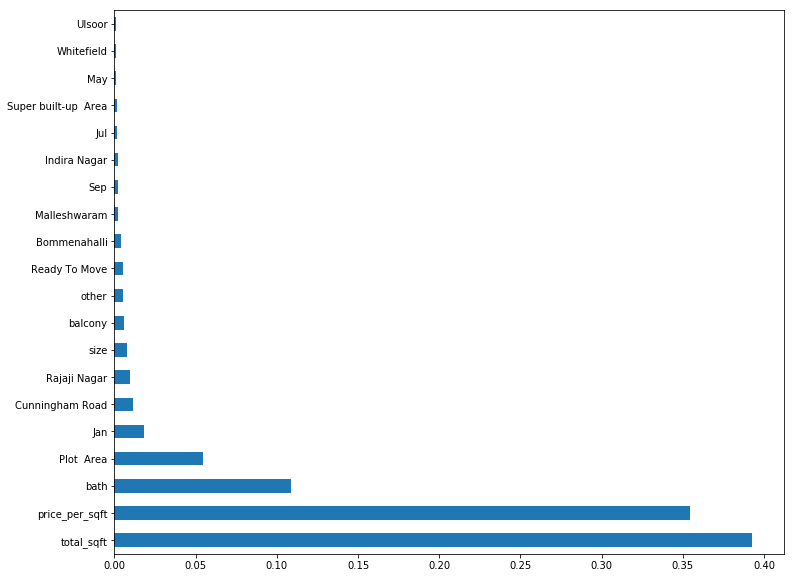

In [94]:
plt.figure(figsize=(12,10))
feature_imp = pd.Series(selection.feature_importances_,index=data_train.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

In [95]:
data_train1 = data_train[['total_sqft','bath','size']]

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data_train,data_test,test_size=0.3)

In [97]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [98]:
regressor.score(X_train,Y_train)

0.9997865733080885

In [99]:
regressor.score(X_test,Y_test)

0.9686536058371137

In [100]:
X = data_train
Y = data_test

In [101]:
X.head()

,size,total_sqft,bath,balcony,Carpet Area,Plot Area,Super built-up Area,Aug,Dec,Feb,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2.0,1056.0,2.0,1.0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2600.0,5.0,3.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1521.0,3.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1200.0,2.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X_train,Y_train)

C:\Users\saifgazali\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [103]:
rfc.score(X_test,Y_test)

0.9646655692991876

In [104]:
def predict_price(location,sqft,bath,bhk,model):
    loc_index = np.where(X.columns == location)[0][0] 
    
    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1
    print(loc_index)
    return model.predict([x])[0]

In [105]:
predict_price('Whitefield',3000,3,3,rfc)

255


47.4

In [106]:
predict_price('Indira Nagar',3000,3,3,rfc)

133


47.4

In [107]:
predict_price('Yeshwanthpur',3000,3,3,rfc)

260


47.4

In [108]:
predict_price('Yelahanka',3000,3,3,rfc)

257


47.4

In [113]:
import pickle 
with open('banglore_house_price.pickle','wb') as f:
    pickle.dump(rfc,f)

In [114]:
import json 
columns = {
    'data_column' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [115]:
### Loading the model from the saved file
with open('banglore_house_price','rb') as f:
    model = pickle.load(f)
predict_price('Yelahanka',3000,3,3,rfc)


257


47.4

In [112]:
pd.isnull(data['bath'][0])

False